<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/OpenCV_DocumentScannerAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
root_image_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'

imgPath=root_image_path+"/scanned-form.jpg"

Mounted at /content/gdrive


In [16]:
img = cv2.imread(imgPath,1)
if (img.any() == None):
  print("Empty Image")

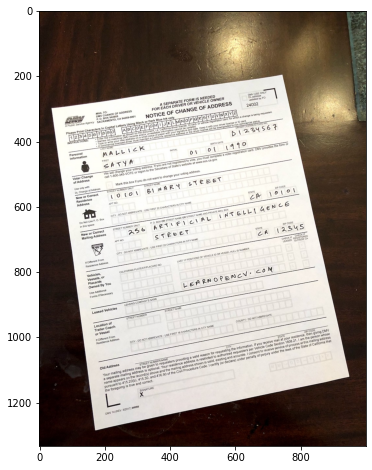

In [17]:
plt.imshow(img[:,:,::-1])

In [18]:
img.shape

(1333, 1000, 3)

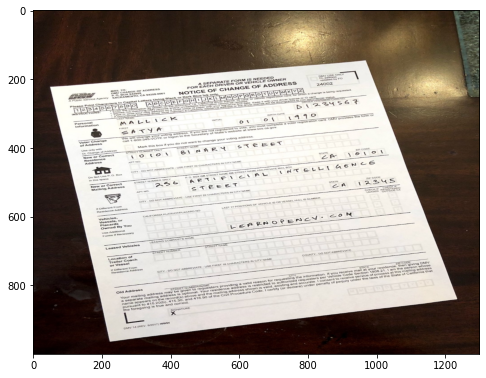

In [62]:
img1 = cv2.resize(img, (1300, 1000))
plt.imshow(img1[:,:,::-1])

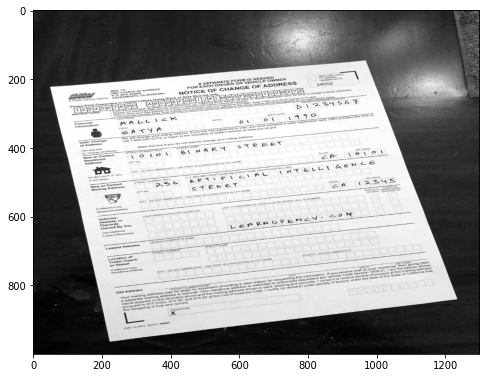

In [63]:

gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

### Blur the image initially

In [64]:
blurred_image = cv2.GaussianBlur(gray_img, (5, 5), 0)

#### Use Canny Edge Detector to detect the edges so that 
#### image can be easily segmented

In [71]:
edged_image = cv2.Canny(blurred_image, 5, 70)
original_edged = edged_image.copy()

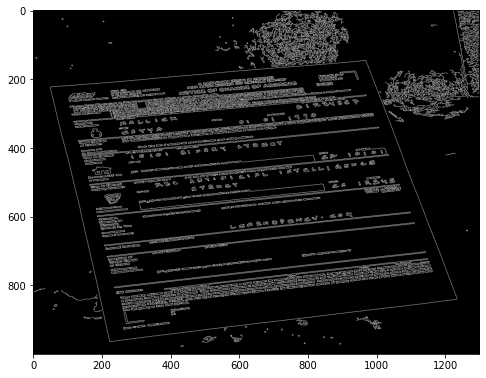

In [72]:
plt.imshow(original_edged)

In [76]:
contours,hierarchy = cv2.findContours(edged_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [83]:
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * p, True)
    if ( len(approx) == 4):
        target = approx
        break
print(target)
print(len(target))

[[[ 967  146]]

 [[  50  223]]

 [[ 223  963]]

 [[1233  840]]]
4


In [78]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [84]:
approx=rectify(target)

In [49]:
#a function named rectify is created to to reshape or rectify the image.
def rectify(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)
    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]
    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]
    return hnew

In [85]:
approx = rectify(target)

In [86]:
pts2 = np.float32([[0,0],[500,0],[500,500],[0,500]])

In [87]:
persTransform = cv2.getPerspectiveTransform(approx,pts2)
final_image = cv2.warpPerspective(img1,persTransform,(500,500))

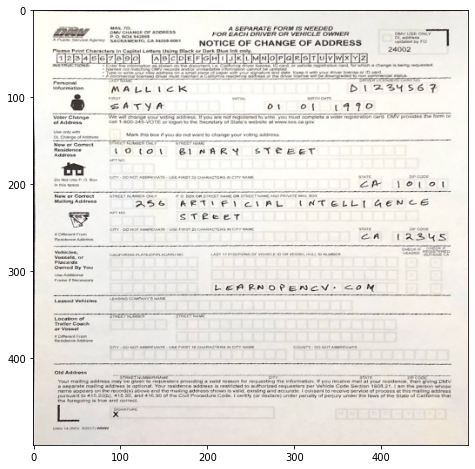

In [88]:
plt.imshow(final_image[:,:,::-1])

In [53]:
cv2.imwrite(root_image_path+"/op3.jpg", final_image)

True